# Capstone -- 1

### Introduction

The objective of this project examines the effects of user engagement after seeing Ad A or Ad B

### Problem
An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad? 

A/B testing is common in the business world and is a way to compare two versions of something to figure out which performs better. Figuring out which ad users prefer is a real life business problem that would be expected to know how to solve as a business data analyst. 

### Dataset

Found on kaggle from an advertising company. https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing

 

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import norm

## Section 1 
> * Load the data
> * Get Basic information such as column descrpitions and types
> * Get initial statistical information to compare when tabie is changed
> * Change as many generic column datatypes to a specific datatype

In [27]:
df_adSmartABdata = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')

In [28]:
# Get an intial look at the data
df_adSmartABdata.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [29]:
# Get the total number of rows 
print("Total number of rows = ", df_adSmartABdata.shape)

Total number of rows =  (8077, 9)


In [30]:
# Get a desription of all the columns
df_adSmartABdata.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 3.1 MB


In [31]:
# Get the basic statistics to compare when the data is changed.
statistics_original = df_adSmartABdata.describe()
statistics_original

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [32]:
# I decide not to do this right now since I don't know what benefit
# would, but kept it in here to show my thought proces

# The documentation states the the fist is the primary key 
# (unique id) so the auction will be set as primary key
#df_adSmartABdata = df_adSmartABdata.set_index('auction_id')

In [33]:
# Convert the columns that are object to a specific type so the 
# developer can use and specific functions for the type of 
# can be easily used on the specific column
#
# I have decided not to convert hours for right now since they are 
# complicated and I want to spend the time other assignments
#
df_adSmartABdata.auction_id = df_adSmartABdata.auction_id.astype(dtype='string')
df_adSmartABdata.date = pd.to_datetime(df_adSmartABdata.date)
#df_adSmartABdata.hour = pd.to_datetime(df_adSmartABdata.hour, format='%H')
df_adSmartABdata.device_make = df_adSmartABdata.device_make.astype(dtype='string')
df_adSmartABdata.browser = df_adSmartABdata.browser.astype(dtype='string')

In [34]:
df_adSmartABdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   string        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   string        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   string        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1), string(3)
memory usage: 568.0+ KB


In [35]:
statistics_new = df_adSmartABdata.describe()
statistics_original

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [36]:
# Had to get rid of the hour since I changed the datatype.  Since I 
# coded it the only tranformation was to change the data type.  The 
# data is still same so I got rid of the data and validated it.
# statistics_new == statistics_original.drop('hour', axis=1)

#
# Purpose to validate that dataset has not changed.
#
statistics_new == statistics_original

,hour,platform_os,yes,no
count,True,True,True,True
mean,True,True,True,True
std,True,True,True,True
min,True,True,True,True
25%,True,True,True,True
50%,True,True,True,True
75%,True,True,True,True
max,True,True,True,True


## Section that will show the count for values for certain columns

This information may be used later, but I want to put it in the area 
where I was initially looking at the data

In [96]:
# Show types for column experiment
df_adSmartABdata_cleanup.experiment.value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [38]:
# Show value counts for device_make
df_adSmartABdata.device_make.value_counts()

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Swift 2 Plus              1
Samsung SM-G955U1         1
Samsung SM-G9730          1
XiaoMi Redmi S2           1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 269, dtype: Int64

In [39]:
# Show value for browser.  This columns needs to be fixed since 
# facebook is not a browser
df_adSmartABdata.browser.value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: Int64

In [40]:
# Shows the ads views during speicific hours -- Note that the 3PM is 
# 4 times higher than everybody else.
pd.DataFrame(df_adSmartABdata['hour'].value_counts()).sort_index()

,hour
0,194
1,222
2,230
3,266
4,281
5,302
6,327
7,381
8,394
9,346


## Analysis of section 1
The goal of section was to load the data and perform an initial analysis.  Also,  Datatypes were changedto representive of the data so it more descriptive and easier to use data type specific function on those columns.

### Discrepancies in the data
> * hour -- stores hours in military time ( 0-23).  It did not state in the documentation explicity 
> * platform_os -- Is just a number this documentation.  There is no documentation about what it menas
> * browser -- Some of this data may inaccurate since facebook was considered a browser, but is an application
> * "yes" and "no" -- It mentioned in different place, but if both are 0 then no data was entered
> * hour -- 1500 is showing 3 times more than any other.  Could a lot
of people be using the site or could this be DDOS Attack or somehting else.

### Enhancements
> * experiment -- Can be transformed into a category.  For further processing down the road, I might provide a function to convert the column to a category
> * "yes" and "no" Can be transformed into a category.  For further processing down the road, I might provide a function to convet the column to a category


In [41]:
## Data Cleanup

In [42]:
df_adSmartABdata_cleanup = df_adSmartABdata.copy()

### Step 1 -- Check for unique data
Checked each row to make sure there were no duplicates.  

I also started wondering if the user could have put in two answers ( ex. one from one machine and one from the other machine).  Even with dropping the primary key there was no way to determine that

In [99]:
# original_size = df_adSmartABdata_cleanup.size
original_size = df_adSmartABdata.size
df_adSmartABdata_cleanup = df_adSmartABdata_cleanup.drop_duplicates()
new_size = df_adSmartABdata_cleanup.size 
print(f"Before/After dropping duplicates: original_size = {original_size} : new_size is {new_size}")

Before/After dropping duplicates: original_size = 72693 : new_size is 72693


### Step 2 -- Check for missing values

After examining the data I have decided to add the empty string check
dataframe to make sure that experiment and browser columns did not have any empty string .  The isna does not check for empty strings.

In [44]:
df_adSmartABdata_cleanup.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [45]:
df_adSmartABdata_cleanup.eq('').sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

### Step 3 -- Outliers
Even though I don't see how they can be outlier in this dataset.  I do
want to check the possibility since it may show fraudiliant activty or 
Human Error

The difference between the earliest and latest date is about week which seem plausible, but I would check with people who created the 
survey.

In [46]:
print("The min date is " + str(df_adSmartABdata_cleanup.date.min()))
print("The max data is " + str(df_adSmartABdata_cleanup.date.max()))

The min date is 2020-07-03 00:00:00
The max data is 2020-07-10 00:00:00


In [47]:
statistics_cleanup_table = df_adSmartABdata_cleanup.describe()
statistics_new == statistics_cleanup_table

,hour,platform_os,yes,no
count,True,True,True,True
mean,True,True,True,True
std,True,True,True,True
min,True,True,True,True
25%,True,True,True,True
50%,True,True,True,True
75%,True,True,True,True
max,True,True,True,True


# Analysis of Cleanup section.
The data was clean and there were no surpises which is fantastic.

# Initial Analysis

In this section the purpose is to get an idea of how the  data is 
balanced.


In [48]:
df_analysis = pd.DataFrame(columns=['Experiment', 'Yes', 'No', 'Not Answered'])

row = []
row.append("All Rows ( Control and Exposed)")
row.append(df_adSmartABdata_cleanup.query(" yes == 1").count()[0])
row.append(df_adSmartABdata_cleanup.query(" no == 1").count()[0])
row.append(df_adSmartABdata_cleanup.query(" yes == 0 and no == 0").count()[0])
df_analysis.loc[0] = row

row = []
row.append("Control")
row.append(df_adSmartABdata_cleanup.query(" yes == 1 and experiment == 'control'").count()[0])
row.append(df_adSmartABdata_cleanup.query(" no == 1 and experiment == 'control'").count()[0])
row.append(df_adSmartABdata_cleanup.query(" yes == 0 and no == 0 and experiment == 'control'").count()[0])
df_analysis.loc[1] = row

row = []
row.append("Exposed")
row.append(df_adSmartABdata_cleanup.query(" yes == 1 and experiment == 'exposed'").count()[0])
row.append(df_adSmartABdata_cleanup.query(" no == 1 and experiment == 'exposed'").count()[0])
row.append(df_adSmartABdata_cleanup.query(" yes == 0 and no == 0 and experiment == 'exposed'").count()[0])
df_analysis.loc[2] = row

df_analysis

,Experiment,Yes,No,Not Answered
0,All Rows ( Control and Exposed),572,671,6834
1,Control,264,322,3485
2,Exposed,308,349,3349


[]

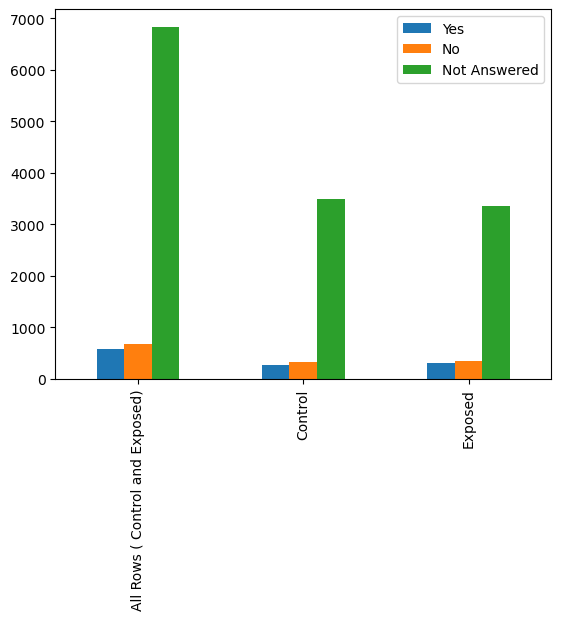

In [49]:
ax = df_analysis.plot.bar()
ax.set_xticklabels(df_analysis.Experiment)
ax.plot()


In [50]:
df_analysis

,Experiment,Yes,No,Not Answered
0,All Rows ( Control and Exposed),572,671,6834
1,Control,264,322,3485
2,Exposed,308,349,3349


# Modeling A/B Testing

Common A/B Test Metric -- I have chosen "The Click Through Rate" since since that seems to be closley related to our problem 

Ctr = 100 * Clicks / impressions

Hypothesis_0 -- There is no difference between showing the control add and the exposed ad.

Hypothesis_1 -- The clicks on the exposed ad are different than the control add


## Calculate the estimates of the probabilities 

P(Control) = Click Y when Experiment = Control and Yes = 1 / count of Experiment

P(Experiment) = Click Y when Experiment = Exposed and Yes = 1 / count of Experiment

In [51]:
df_analysis

,Experiment,Yes,No,Not Answered
0,All Rows ( Control and Exposed),572,671,6834
1,Control,264,322,3485
2,Exposed,308,349,3349


In [100]:
control_yes = df_analysis[df_analysis.Experiment == 'Control'].Yes.item()
control_no  = df_analysis[df_analysis.Experiment == 'Control'].No.item()
exposed_yes = df_analysis[df_analysis.Experiment == 'Exposed'].Yes.item()
exposed_no  = df_analysis[df_analysis.Experiment == 'Exposed'].No.item()

n_total_sample_for_control = control_yes + control_no
n_total_sample_for_exposed = exposed_yes + exposed_no

print("control_yes:", control_yes, " n_total_sample_for_control:", n_total_sample_for_control, \
    "exposed_yes:", exposed_yes, "n_total_sample_fox_exposed:", n_total_sample_for_exposed)

control_yes: 264  n_total_sample_for_control: 586 exposed_yes: 308 n_total_sample_fox_exposed: 657


In [101]:
# Select your alpha significance -- The signifience of rejecting the 
# null hypothesis is true.
alpha = .05

In [102]:
# Get an estimate of the probability of the Yes clicks of both the 
# control group and the exposed group
p_control_hat = np.round( control_yes / n_total_sample_for_control, 3)
p_exposed_hat = np.round( exposed_yes / n_total_sample_for_exposed, 3)

print("estimated (all) proabilty of Yes for Control Group:", p_con_hat, " probaility for the Yes for exposed Group", p_exp_hat)

estimated (all) proabilty of Yes for Control Group: 0.451  probaility for the Yes for exposed Group 0.469


In [67]:
# Get an estimate of the pool probability and pooled variance
# pooled variance -- combines the estimate within the individual 
# groups.  A better estimate of the unknown common population variance 
# than either of the individual group variance

# Get an estimated probability for the population
pooled_probability_success = ( control_yes + exposed_yes ) / \
    ( n_total_sample_for_control + n_total_sample_for_exposed )

# Get an estimated standard devaiation for the population
pooled_probability_variance = pooled_probability_success * \
    (1 - pooled_probability_success ) *\
    (1/n_total_sample_for_control + 1/n_total_sample_for_exposed)

pooled_probability_success = np.round(pooled_probability_success,3)
pooled_probability_variance = np.round(pooled_probability_variance,3)
print("pooled probability",pooled_probability_success,"pooled variance = ", pooled_probability_variance)

pooled probability 0.46 pooled variance =  0.001


In [68]:
# Calculate the Standard Error -- Accuracy which a sample distribution
# represents the population.  
# Describe the variation of the mean of the population and one which
# is known or accepted as accruate.
#    A high standard error shows the items are widly spread around 
#    the population mean and may not closely represent your population
#
# Standard Deviation describes variability within a sample
# Standard Error describes variabily across multiple sampels

standard_error = np.round(np.sqrt(pooled_probability_variance),3)
print("The Standard Error is ", standard_error)

The Standard Error is  0.032


In [69]:
# Test Statitics -- Number calculated from a statistical test of a 
# hypothesis to see how closely your observed data matches the 
# distribution expected under the null hypothesis 
z_score = (p_control_hat - p_exposed_hat ) / standard_error
print("The test statistics (zcore all called test_stat) is ", z_score)

The test statistics (zcore all called test_stat) is  -0.5624999999999988


In [70]:
# Critical Value -- Determine whether the results are statistically significient 
# norm.ppf -- A normal random continous value using the Percent Point Function
#    Percent Point Function is the cumulative distribution function
# alpha divided by two means  there a normal distribution that is symmetric
z_critical = np.round(norm.ppf(1- (alpha/2)),3 )
print("z_critical = ", z_score)

z_critical =  -0.5624999999999988


In [71]:
# Margin of error -- The margin of error in statistics is the degree 
# of error in results received from random sampling surveys. A 
# higher margin of error in statistics indicates less likelihood 
# of relying on the results of a survey or poll
margin_of_error = np.round(standard_error * z_critical,3)
print("margin of error", margin_of_error)


margin of error 0.063


In [72]:
# Confidence Interval -- A confidence interval is the mean of your 
# estimate plus and minus the variation in that estimate. This is 
# the range of values you expect your estimate to fall between if 
# you redo your test
p_hat = p_control_hat - p_exposed_hat
confidence_level  = [p_hat - standard_error * z_score, \
                     (p_hat - standard_error * z_score) + \
                     standard_error * z_score]
confidence_level = np.round(confidence_level, 3)
print("confidence level ", confidence_level)


confidence level  [ 0.    -0.018]


In [77]:
# The analysis of the z-score
z_score = np.abs(z_score)
rejection = z_score >= z_critical
print(z_score, z_critical)
print("rejection is ", rejection)

if rejection:
    print("reject the null hypostheis")
else: 
    print("failed to reject the null hypothesis")


0.5624999999999988 1.96
rejection is  False
failed to reject the null hypothesis


## Answer the second hypothesis testing

The question is given the large amount of customers saying did it 
have any effect on questionare.

Hypothesis0 -- The people that did not answer did not have an affect
on the outcome of the survey.

Hypothesis1 -- The people that did non answer did have an affect on the 
outcome of the survey.

In [78]:
# Is the data balanced
df_analysis

,Experiment,Yes,No,Not Answered
0,All Rows ( Control and Exposed),572,671,6834
1,Control,264,322,3485
2,Exposed,308,349,3349


In [79]:
# Show that the data is unbalanced

number_yes_or_no = df_analysis.iloc[0,1].item() + df_analysis.iloc[0,2].item()
number_not_answered = df_analysis.iloc[0,3].item()

in_balance = number_yes_or_no / number_not_answered
print("The number of yes or no is:", number_yes_or_no)
print("The number of not answered", number_not_answered)
print("There ratio of answered to unaswered is",np.round(in_balance,3))
print("The subdatasets are definitely unbalanced and the value is not remotely close 1")

The number of yes or no is: 1243
The number of not answered 6834
There ratio of answered to unaswered is 0.182
The subdatasets are definitely unbalanced and the value is not remotely close 1


### Proposed Fix

Since the data is unbalance and based on the discussion in class I 
have decide to go with binominal distribution 

1. After some research, I came upon this website: https://www.researchgate.net/post/Can_someone_suggest_a_statistical_test_to_be_applied_on_unbalanced_panel_data

(ii) Discrete Data. Now if the data is dichotomous, the test turns to binomial distribution test. One population binomial distribution test may be given by:

Paul Louangrath was the author and he talked speicially when the data was discrete.  Since we are dealing with 0's and 1's.

(5)   Z = (p - p0) / sqrt(p0(1 - P0) / n)
... where p = observed proportion of specified class; p0 = proportion of class of interest in the population; n = sample size. Assuming that the data reading is taken at the same time. If the data is taken at two separate time reading, i.e. pre- and post-introduction of stimulus then a Z-test for two counts Poisson distribution is used. From the stated facts, "... divided into two groups depending on presence or absence of independent variable ..." it appears you have dichotomous data: presence = yes and non-presence = no; therefore, yes = 1 and no =0. Otherwise, follow the non-discrete routine.

Reason for using this algorithm.  It allow for the creation of a z-score.



In [80]:
df_analysis

,Experiment,Yes,No,Not Answered
0,All Rows ( Control and Exposed),572,671,6834
1,Control,264,322,3485
2,Exposed,308,349,3349


## Question:

Did the large number of unaswered have an effect on the exposed not 
being not doing as well



In [87]:
# Define the variables used in equation
#
# Defined the problem this way : Give the sample it is a simple 
# binary tree.
# 
# The total population is split into Answered or did not Answer

# Sample Space 
sample_space = df_analysis.loc[0,'Yes'] + \
    df_analysis.loc[0, 'No'] + \
    df_analysis.loc[0,'Not Answered']
print("The sample space is " + str(sample_space))


# The proportion class of interest ( rate ) will have two 
# variables calculated
# 1. The number of users that went to the control and did not answer
# 2. The number of users that went to the exposed and did not answer

control_total_answered = df_analysis.loc[1,'Yes'] + df_analysis.loc[1,'No']
control_result_answered = total_answered / df_analysis.loc[1,'Not Answered']  

exposed_total_answered = df_analysis.loc[2,'Yes'] + df_analysis.loc[2,'No']
exposed_result_answered = total_answered / df_analysis.loc[2,'Not Answered']  

print("control result answered", control_result_answered)
print("exposed result answered", exposed_result_answered)


The sample space is 8077
control result answered 0.16814921090387375
exposed result answered 0.1749776052553001


In [90]:
# Find the standard deviation
std_control = np.sqrt(
    control_result_answered * (1 - control_result_answered) /\
        control_total_answered)

std_exposed = np.sqrt(\
    exposed_result_answered * (1 - exposed_result_answered) /\
        exposed_total_answered)

In [91]:
# Calculate the z-score
z_score = (exposed_result_answered - control_result_answered) /\
    np.sqrt(std_control**2 + std_exposed**2)

0.3748923556198933

In [104]:
print("z_score",z_score, " and z_critical", z_critical)
z_score > z_critical
if ( z_score > z_critical):
    print("Reject the null")
else:
    print("failed to reject the null hypothesis")

z_score 0.3189232526799223  and z_critical 1.96
failed to reject the null hypothesis
